In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Time Signal**

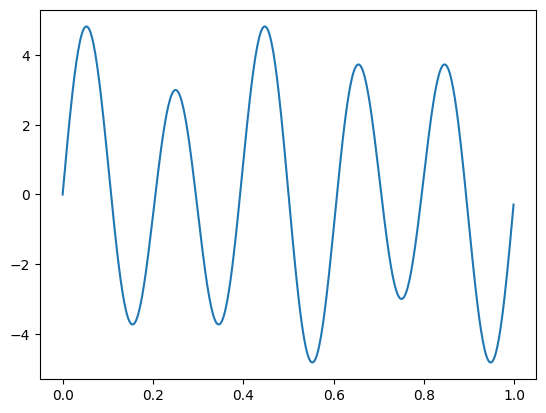

In [ ]:
fs = 500
t = np.arange(0, 1, 1/fs)
a1 = 1
a2 = 4
xn = a1 * np.sin(2*np.pi*3*t) + a2 * np.sin(2*np.pi*5*t)
plt.plot(t, xn)
plt.show()

# **Frequency based FFT**

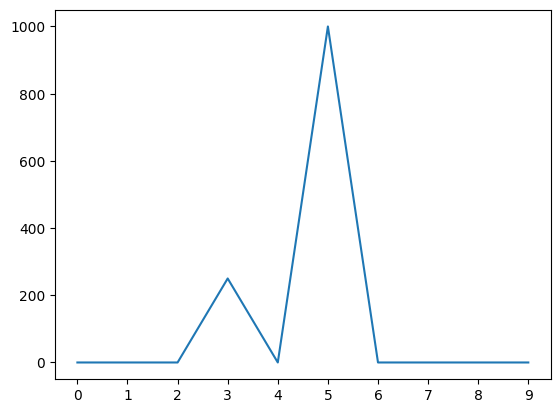

In [ ]:
f_win = np.arange(0,10)
y = []
for fw in f_win:
  temp = np.sum(xn*np.exp(-2j*np.pi*fw*t))
  y.append(abs(temp.imag))
plt.plot(f_win, y)
plt.xticks(np.arange(0, 10, 1))
plt.show()

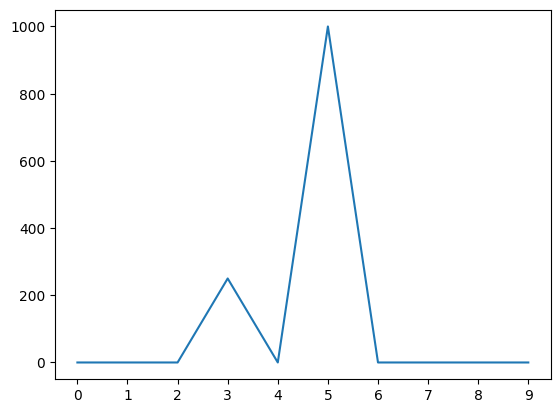

In [ ]:
y_win = np.fft.fft(xn)
plt.plot(abs(y_win[0:10]))
plt.xticks(np.arange(0, 10, 1))
plt.show()

# **Amplitude Based FFT**

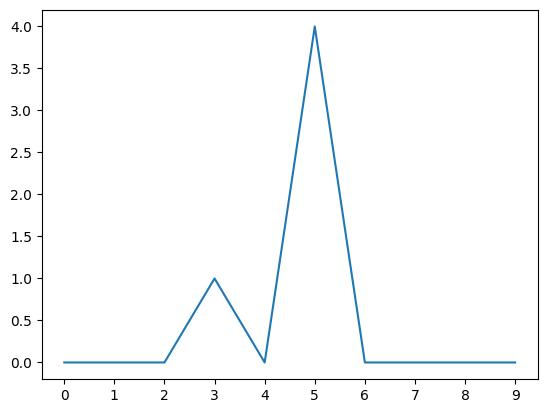

In [ ]:
f_win = np.arange(0,10)
y = []
for fw in f_win:
  temp = np.sum(xn*np.exp(-2j*np.pi*fw*t))
  y.append((2/fs) * abs(temp.imag))
plt.plot(f_win, y)

plt.xticks(np.arange(0, 10, 1))
plt.show()

# **Power-Based FFT**

In [ ]:
def pow2db(x):
  return 10*np.log10(x)

<ipython-input-208-05b959186dc7>:2: RuntimeWarning: divide by zero encountered in log10
  return 10*np.log10(x)


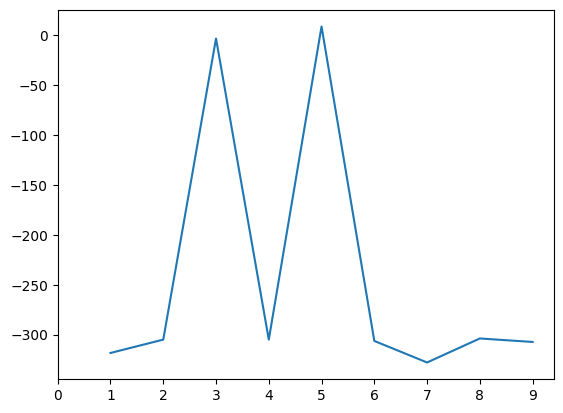

In [ ]:
f_win = np.arange(0,10)
y = []
for fw in f_win:
  temp = np.sum(xn*np.exp(-2j*np.pi*fw*t))
  power = (2/fs**2) * temp.imag**2
  power = pow2db(power)
  y.append(power)
plt.plot(f_win, y)
plt.xticks(np.arange(0, 10, 1))
plt.show()

# **Power Spectrum Density**

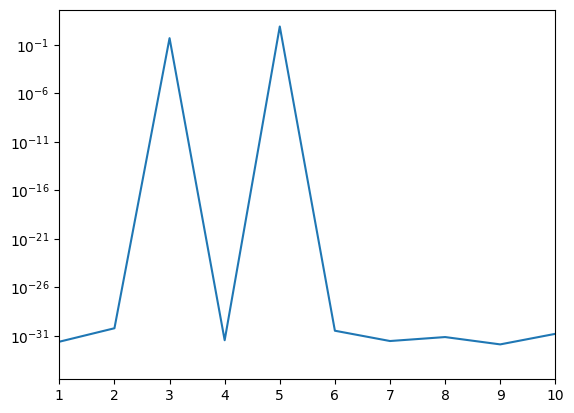

In [ ]:
import scipy.signal
f, Pxx_den = scipy.signal.periodogram(xn, fs)
plt.semilogy(f, Pxx_den)
plt.xlim([1,10])
plt.show()

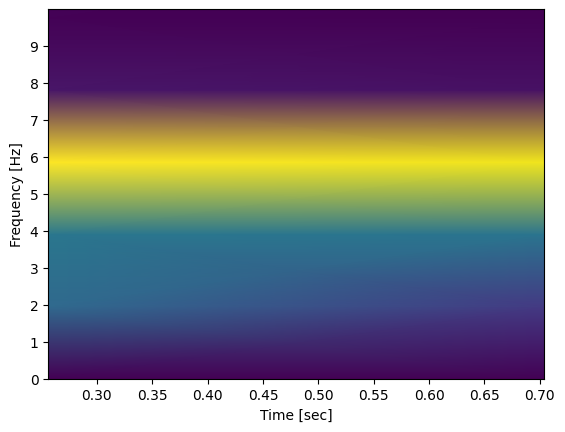

In [ ]:
f, t, Sxx = scipy.signal.spectrogram(xn ,fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim([0, 10])
plt.yticks(np.arange(0, 10, 1))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()